In [1]:
from drl import DEMSimulator
from drl.utils import load_config
from drl import RainfallSimulator
from drl import DiffusiveWaveRouter
from drl.utils import save_h, make_gif_from_frames
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Example usage
dem_simulator = DEMSimulator("../config/config_dem1.yaml")
dem_simulator.generate_all_dems()
dems = dem_simulator.get_dems()

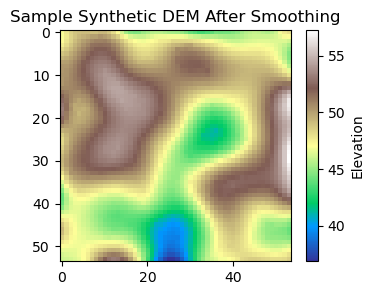

In [3]:
# Visualize one of the DEMs
for i in range(len(dems)):
    plt.figure(figsize=(4, 3))
    plt.imshow(dems[i], cmap='terrain')
    plt.colorbar(label='Elevation')
    plt.title('Sample Synthetic DEM After Smoothing')
    plt.show()

In [4]:
rain_simulator = RainfallSimulator()
rain = rain_simulator.generate(dems[0])  

In [5]:
len(rain)

24

In [6]:
router = DiffusiveWaveRouter(dem=dems[0])
h_sequence = router.run(rain)

Routing: 100%|██████████| 48/48 [00:00<00:00, 8251.43it/s]


In [7]:
len(h_sequence)

96

In [9]:
save_h(h_sequence, dem=dems[0], out_dir='outputs/frames')
make_gif_from_frames(out_dir='outputs/frames', gif_name='rainstorm.gif', fps=9)

✅ GIF saved to outputs/frames/rainstorm.gif
